In [1]:
import matplotlib.pyplot as plt
import numpy as np

from exchange import Exchange
from market import Market
from dummy_trader import DummyTrader
from informed_trader import InformedTrader
from liquidator import Liquidator
from market_maker import MarketMaker
from utils import generate_price_stream

/Users/zhouzijian/miniconda3/envs/cta_trader/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [10]:
tick_size = 1
arparams = [.75, .25]
maparams = [.65, .35]
price_length = 3600


In [11]:
price_stream_1 = generate_price_stream(price_length, arparams, maparams)
price_stream_1 = np.round(price_stream_1 + 100) // tick_size * tick_size

price_stream_2 = price_stream_1 + generate_price_stream(price_length, [-0.75], [2.0])
price_stream_2 = np.round(price_stream_2 - 100) // tick_size * tick_size

In [12]:
market1 = Market(price_stream_1, tick_size)
market2 = Market(price_stream_2, tick_size)

In [13]:
exchange = Exchange(market1)

In [14]:
players = [
    MarketMaker("mm1", 20, 0.2),
    DummyTrader("dummy1"),
    DummyTrader("dummy2"),
    DummyTrader("dummy3"),
    InformedTrader("inf1"),
    Liquidator("liq1", intensity=2.0),
    Liquidator("liq2", intensity=3.0),
    Liquidator("liq3", intensity=4.0),
    Liquidator("liq4", intensity=5.0),
    Liquidator("liq5", intensity=6.0),
    Liquidator("liq6", intensity=7.0),
    MarketMaker("mm2", 50, 0.1),
    MarketMaker("mm3", 10, 0.1)
]

In [15]:
for player in players:
    exchange.register_player(player)

In [16]:
exchange.reset()
market1.reset()
market2.reset()
while not (market1.is_end or market2.is_end):
    orders = []
    for player in players:
        orders += player.place_order(exchange)
    exchange.reset()
    exchange.receive_orders(orders)
    exchange.match_orders()
    market1.tick()
    market2.tick()
    

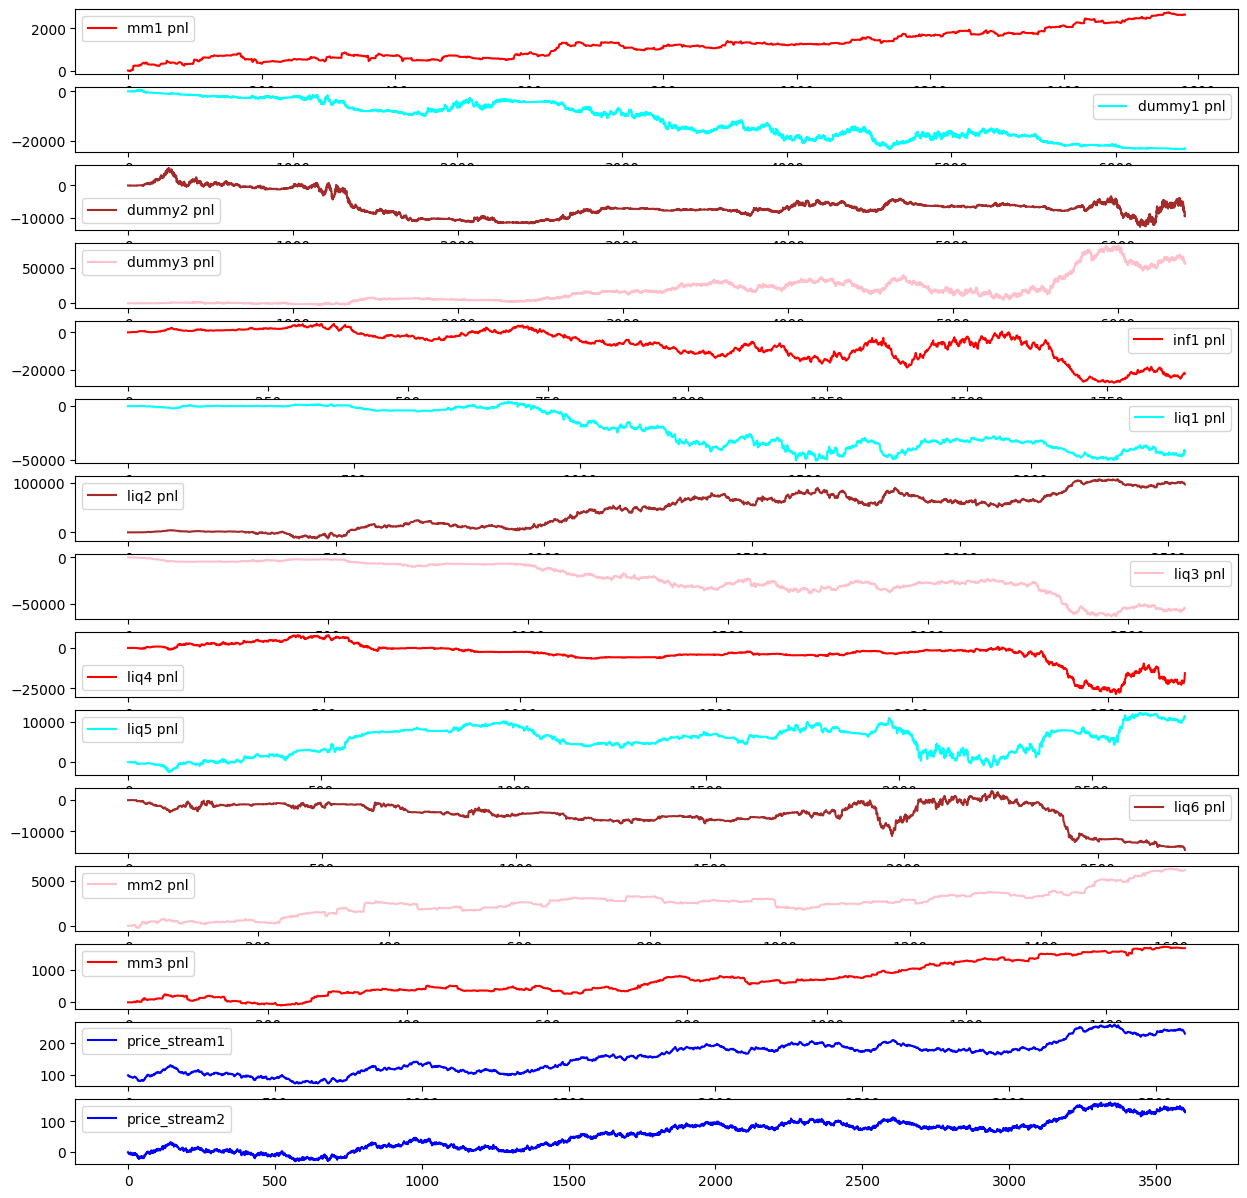

In [17]:
C = ["red", "cyan", "brown", "pink"]

fig, axs = plt.subplots(len(players) + 2, figsize=(15, 15))

for i in range(len(players)):
    ax = axs[i]
    c = C[i%len(C)]
    ax.plot(players[i].pnl, c=c, label=f"{players[i].id} pnl")
    ax.legend()

axs[-2].plot(price_stream_1, c="blue", label="price_stream1")
axs[-2].legend()
axs[-1].plot(price_stream_2, c="blue", label="price_stream2")
axs[-1].legend()
plt.show()